In [1]:
import pandas as pd
import numpy as np
import os
import git
import ast
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm_notebook as tqdm
import tweepy
from cascade import Cascade

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/akshayuppal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/akshayuppal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akshayuppal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
pd.set_option('display.max_colwidth', -1)
cas = Cascade()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
def get_git_root(path):
    git_repo = git.Repo(path, search_parent_directories=True)
    git_root = git_repo.git.rev_parse("--show-toplevel")
    return git_root

In [5]:
hexagon_path = os.path.join(get_git_root(os.getcwd()),"input","hexagonData.csv")
hexagon_data = pd.read_csv(hexagon_path,lineterminator="\n")

In [8]:
## looking at the cascade 182 (juul)
cascade3 = hexagon_data.loc[hexagon_data.retweetCount == 182]

In [12]:
list(cascade3.tweetText.head(1))[0]

'The #Juul ruining friendships pt.2 https://t.co/xGno0mLpwp'

In [13]:
source_node = cascade3.head(1).userID.values[0]

In [15]:
users = list(cascade3.userID.unique())
users.remove(source_node)

In [16]:
G, first_nodes = cas.create_cascade_lvl_1(source_node,users,hexagon_data)

100%|██████████| 133/133 [13:25<00:00,  3.65it/s]  


In [17]:
first_nodes

[4357270032]

In [19]:
G = cas.get_node_attributes(G,users,hexagon_data,1,source_node=source_node)

In [22]:
color_map = list()
for (node) in G.nodes():
    if (node) == source_node:
        color_map.append("yellow")
    else:
        if node in set(first_nodes):
            color_map.append("red")

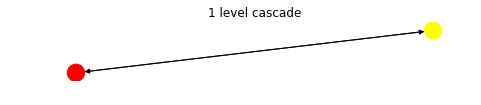

In [26]:
%matplotlib inline
nx.draw(G,node_color=color_map,with_labels=False,)
# nx.draw(G,nodelist=pos.keys(),pos=pos,node_color=color_map,with_labels=False,)
ax = plt.gca()
ax.set_aspect('equal')
ax.set_axis_off()
plt.title("1 level cascade")
plt.show()

In [ ]:
#@ param df, source_node, user_list, level_terminate= 5
def get_cascade(df,source_node,user_list,level_termiante)
    G, first_users = cas.create_cascade_lvl_1(source_node,user_list,df)
    # rest levels
    G = cas.get_node_attributes(G,users,hexagon_data,1,source_node=source_node)
    rem_users = set(users) - set(first_nodes)
    level = 1
    users_next = first_users
    while (level <= level_terminate):
        G , users_next , rem_users = cas.create_cascade(G,users_next,rem_users)
        G = cas.get_node_attributes(G,users_next,df,level)
        level +=1

In [36]:
rem_users = set(users) - set(first_nodes)

In [38]:
G1 , second_users , rem_users = cas.create_cascade(G,first_nodes,rem_users)

  0%|          | 0/1 [00:00<?, ?it/s]

finding connection for following network might take some time



  0%|          | 0/1 [00:00<?, ?it/s]

finding connection for followers network might take some time



100%|██████████| 1/1 [00:00<00:00,  7.41it/s]


In [39]:
len(second_users)

1

In [43]:
G = cas.get_node_attributes(G,first_nodes,hexagon_data,1)
G = cas.get_node_attributes(G,second_users,hexagon_data,2)

In [58]:
shells =  [[source_node]] + [first_nodes] + [second_users]
pos = nx.shell_layout(G,shells)

In [59]:
shells

[[2436000656], [4357270032], [1416614886]]

In [60]:
## for shells
color_map = list()
for (node) in pos.keys():
    if node == source_node:
        color_map.append("yellow")
    else:
        if node in set(second_users):
            color_map.append("green")
        elif node in set(first_nodes):
            color_map.append("blue")

In [61]:
G.nodes()

NodeView((2436000656, 4357270032, 1416614886))

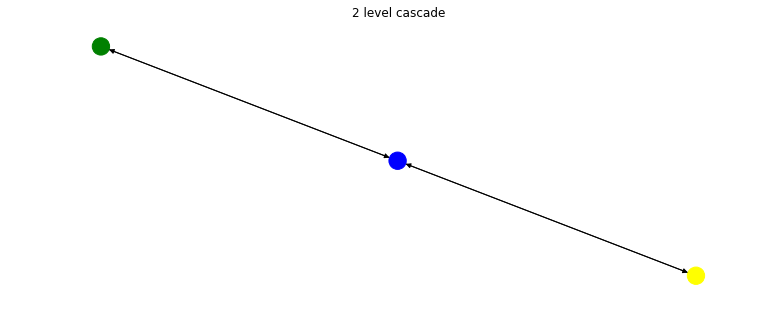

In [63]:
%matplotlib inline
plt.figure(figsize=(10,10))
nx.draw(G,node_color=color_map,with_labels=False,)
ax = plt.gca()
ax.set_aspect('equal')
ax.set_axis_off()
plt.title("2 level cascade")
plt.show()

### dump the graph

In [64]:
# gpickle the graph
nx.write_gpickle(G,"/Users/akshayuppal/Desktop/thesis/twitter_juul/models/cascade3.gpickle")